In [ ]:
import pandas as pd
import numpy as np
from math import * 
import networkx as nx
from sklearn.cluster import KMeans
import pickle
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(16,16))
plt.rcParams.update({'figure.figsize': (16, 8)})

<Figure size 1152x1152 with 0 Axes>

In [ ]:
def elbow(X, sup):
    sse = []
    sup=sup
    p=range(1,sup+1)
    for k in p:
  
        kmeans = KMeans(n_clusters=k, n_init = 1000, max_iter = 20)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
  
    plt.style.use("fivethirtyeight")
    plt.plot(p, sse)
    plt.xticks(p)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    kn = KneeLocator(p, sse, curve='convex', direction='decreasing')
    kn.plot_knee()

def silouhette(X, sup):
    s_score = []
    for i in range(2,sup+1):
        km = KMeans(n_clusters = i , n_init = 1000, max_iter = 1000)
        km.fit_predict(X)
        # Calculate Silhoutte Score
        score = silhouette_score(X, km.labels_)
        s_score.append(score)
      
    fig, ax = plt.subplots()
  
    ax.plot([i for i in range(2,sup+1)], s_score)


In [ ]:
def node_group(result):
    node_part = []
    for i in sorted(result.cluster.unique().tolist()):
        c = list(result[result.cluster == i].node)
        node_part.append(c)
    
    return node_part
def plot_coms(coms):
    k = len(coms)

    node_size=[]
    for i in range(k):
        com_list=[]
        for j in coms[i]:
            list1 = data.head(k).index.tolist()
            if j in list1:
                com_list.append(1000)
            else:
                com_list.append(100)
        node_size.append(com_list)
        
    keyList = data.head(k).index.tolist()
    myDict = {key: key for key in keyList}
  
    plt.style.use("default")
    plt.figure(figsize=(16,8))
    # plt.rcParams.update({'figure.figsize': (16, 8)})
    shapes=['s','o','^','>','v','<','d','p','h','8','s','o','^','>','v','<','d','p','h','8']
    colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange', 'aqua','olive','indigo', 'lawngreen', 'burlywood','slategray']
    for i in range(k):
        nx.draw_networkx(G, pos=sp, nodelist = coms[i], node_color= colors[i],node_shape=shapes[i],node_size = node_size[i] ,with_labels=False , edgecolors='black')

    labels=nx.draw_networkx_labels(G,pos = sp, labels=myDict, font_color='w', font_weight='bold')
    return

In [ ]:
# create the graph
G = nx.read_edgelist("facebook_combined.txt", nodetype = int)

#load graph layout
with open('networkShape.pkl', 'rb') as f:
    sp = pickle.load(f)
# read centrality measures
data = pd.read_csv("TOPSIS_result.csv", header = 0)
data.drop(columns=['TOPSIS'], inplace=True)
data = data.set_index('node')

measures = data.values

mat = nx.to_numpy_array(G, nodelist = data.index.tolist() )

# Elbow method

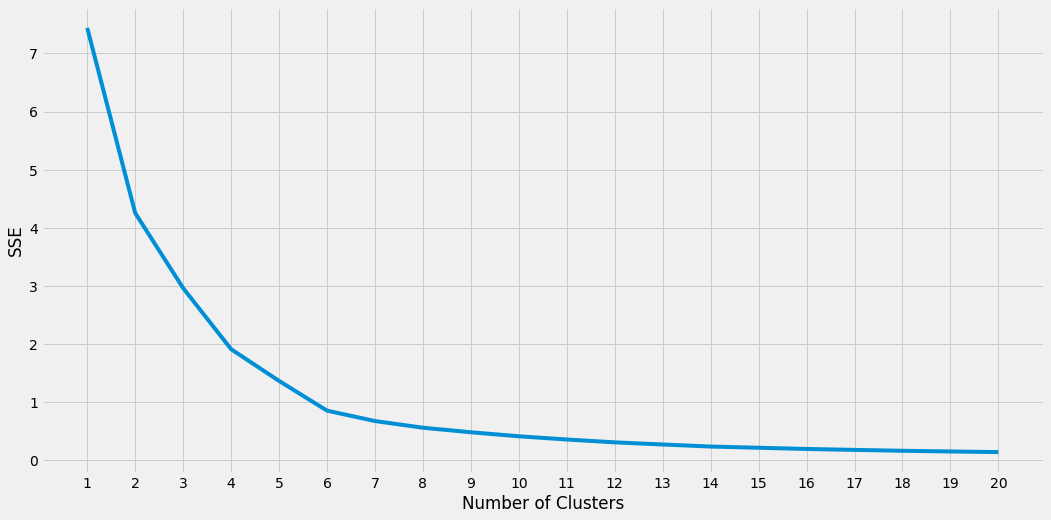

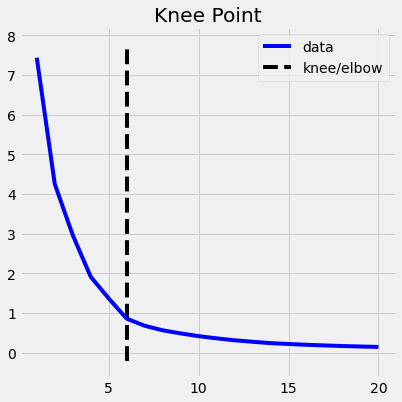

In [ ]:
elbow(measures, 20)

# Silouhette score

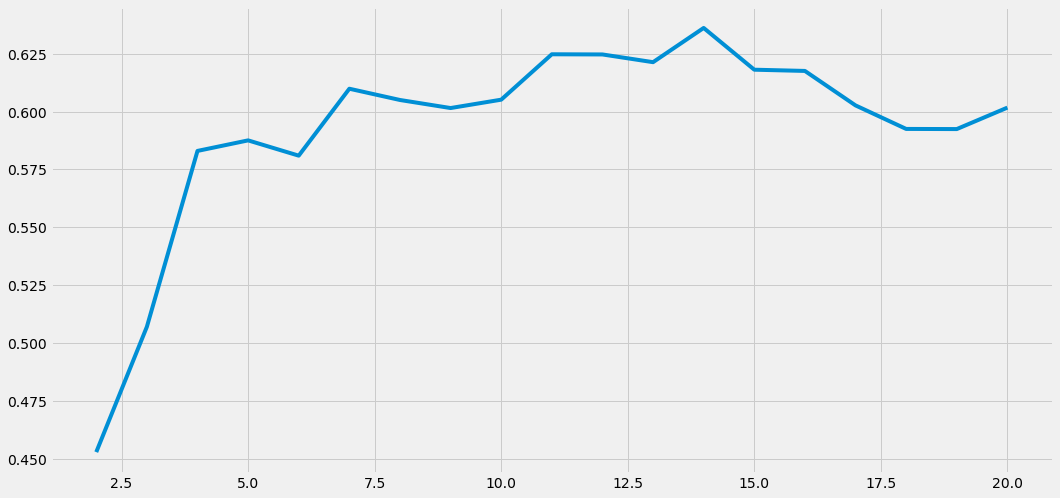

In [ ]:
silouhette(measures, 20)

# Clustering with k found by silouhette method (14)

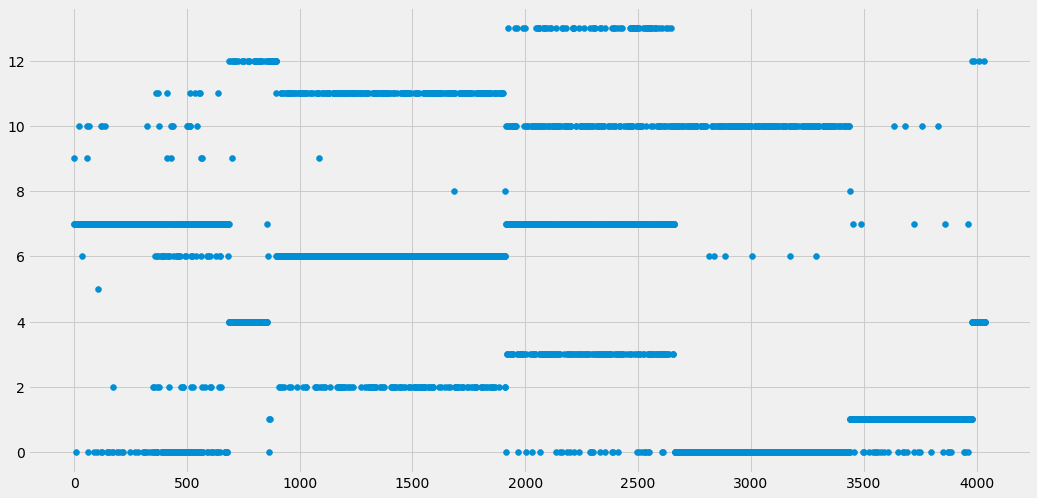

In [ ]:
data = pd.read_csv("TOPSIS_result.csv", header = 0)
data.drop(columns=['TOPSIS'], inplace=True)
data = data.set_index('node')

k = 14 

X = data.values
km = KMeans(n_clusters = k)
cluster = km.fit_predict(X)
data['cluster'] = cluster
result = pd.DataFrame(data['cluster'])
result.reset_index(inplace=True)
result.rename(columns={"index":'node'}, inplace=True)
plt.scatter(result['node'], result['cluster'])

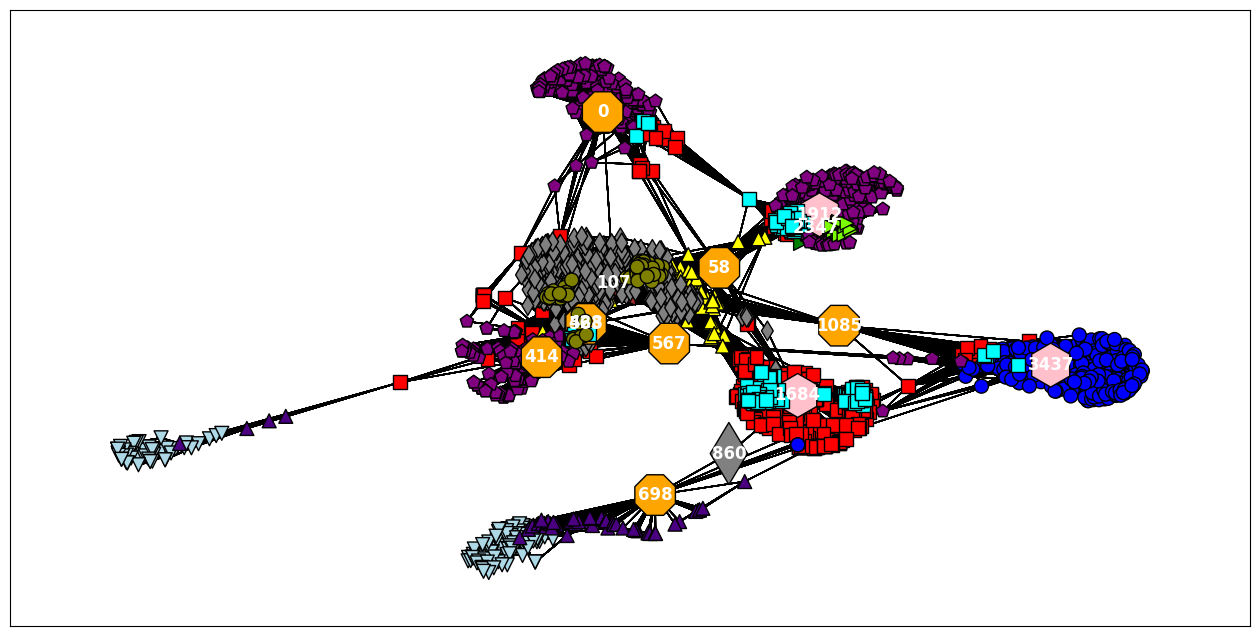

In [ ]:
node_partition = node_group(result)
plot_coms(node_partition)